<a href="https://colab.research.google.com/github/ahmadkaleem2/Fashion_mnist/blob/main/Fashion_mnist_models%20(Merging%20two%20neural%20networks).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Importing fashion mnist dataset and loading into training and test set

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_data,train_labels) , (test_data,test_labels) = fashion_mnist.load_data()

# Plotting a random image from the dataset

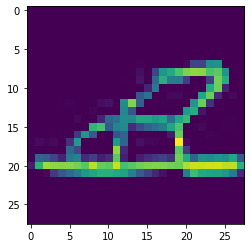

In [ ]:
train_or_test = tf.round(np.random.uniform(0,1))
if train_or_test==0:
  image = train_data[np.random.randint(train_data.shape[0])]
else:
  image = train_data[np.random.randint(test_data.shape[0])]

plt.imshow(image)

# Pixel values of the selected image

In [ ]:
image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

# Dividing the images by the maximum value to convert image between 0 and 1

In [ ]:
train_data_norm = train_data/255.
test_data_norm = test_data/255.

# Rescaling image so that convolution can be applied 

In [ ]:
train_data_norm = train_data_norm.reshape((60000,28,28,1))
test_data_norm = test_data_norm.reshape((10000,28,28,1))

In [ ]:
tf.random.set_seed(42)



model_1 = tf.keras.Sequential([
                               tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
                               tf.keras.layers.MaxPool2D((2,2)),
                               tf.keras.layers.Flatten(),
                               tf.keras.layers.Dense(100,'relu'),
                               tf.keras.layers.Dense(10,'softmax')
                               
])



model_1.compile(optimizer=tf.keras.optimizers.Adam(),loss=tf.keras.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])
model_1.fit(train_data_norm,train_labels,epochs=15,validation_data=(test_data_norm,test_labels),)

Epoch 1/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4092 - accuracy: 0.8538 - val_loss: 0.3215 - val_accuracy: 0.8843
Epoch 2/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2738 - accuracy: 0.9012 - val_loss: 0.3208 - val_accuracy: 0.8845
Epoch 3/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2313 - accuracy: 0.9141 - val_loss: 0.2653 - val_accuracy: 0.9038
Epoch 4/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1985 - accuracy: 0.9275 - val_loss: 0.2560 - val_accuracy: 0.9066
Epoch 5/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1734 - accuracy: 0.9354 - val_loss: 0.2581 - val_accuracy: 0.9115
Epoch 6/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1504 - accuracy: 0.9441 - val_loss: 0.2641 - val_accuracy: 0.9102
Epoch 7/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1309 - accuracy: 0.9515 - val_loss: 0.2620 - val_accuracy:

In [ ]:
tf.random.set_seed(42)

def scheduler(epoch,lr):
  if epoch>10:
    return lr*0.5
  return lr

model_2 = tf.keras.Sequential([
                               tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
                               tf.keras.layers.MaxPool2D((2,2)),
                               tf.keras.layers.Flatten(),
                               tf.keras.layers.Dense(100,'relu'),
                               tf.keras.layers.Dense(10,'softmax')
                               
])

callback = tf.keras.callbacks.LearningRateScheduler(scheduler)

model_2.compile(optimizer=tf.keras.optimizers.Adam(),loss=tf.keras.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])
model_2.fit(train_data_norm,train_labels,epochs=15,validation_data=(test_data_norm,test_labels),callbacks=[callback])

Epoch 1/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4090 - accuracy: 0.8539 - val_loss: 0.3234 - val_accuracy: 0.8840
Epoch 2/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2721 - accuracy: 0.9022 - val_loss: 0.3154 - val_accuracy: 0.8855
Epoch 3/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2285 - accuracy: 0.9153 - val_loss: 0.2636 - val_accuracy: 0.9026
Epoch 4/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1965 - accuracy: 0.9277 - val_loss: 0.2511 - val_accuracy: 0.9101
Epoch 5/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1712 - accuracy: 0.9367 - val_loss: 0.2570 - val_accuracy: 0.9096
Epoch 6/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1487 - accuracy: 0.9453 - val_loss: 0.2804 - val_accuracy: 0.9043
Epoch 7/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1286 - accuracy: 0.9511 - val_loss: 0.2663 - val_accuracy:

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
import itertools 
from sklearn.metrics import confusion_matrix
figsize = (10,10)

# create the confusion matrix
def make_confusion_matrix(y_true,y_pred,classes=None,figsize=(10,10),text_size=15):



  cm = confusion_matrix(y_true,y_pred)
  cm_norm = cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
  n_classes = cm.shape[0]

  fig,ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm,cmap=plt.cm.Blues)
  fig.colorbar(cax)



  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  ax.set(title="confusion matrix",xlabel='predicted label',ylabel='True label',xticks = np.arange(n_classes),yticks=np.arange(n_classes),xticklabels=labels,yticklabels=labels)
  ax.xaxis.set_label_position('bottom')
  ax.xaxis.tick_bottom()

  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(20)

  threshold = (cm.max()+cm.min())/2.

  #plot text on each cell
  for i, j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j,i,f"{cm[i,j]} ({cm_norm[i,j]*100:0.1f}%)",
            horizontalalignment='center',
            color="white" if cm[i,j]>threshold else "black",
            size=15)


# Evaluation of model without learning rate scheduler

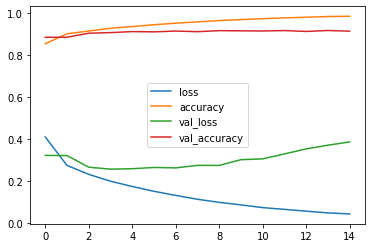

In [ ]:
pd.DataFrame(model_1.history.history).plot()

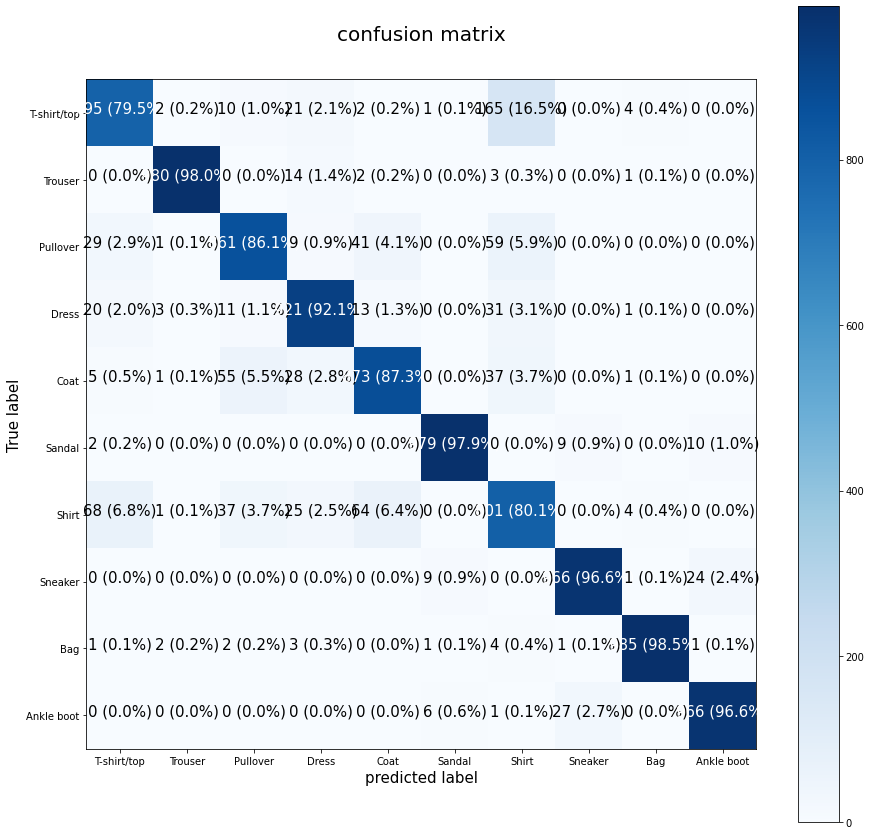

In [ ]:
make_confusion_matrix(test_labels,tf.argmax(tf.round((model_1.predict(test_data_norm))),axis=-1),class_names,figsize=(15,15))

# Evaluation of model with Learning rate scheduler

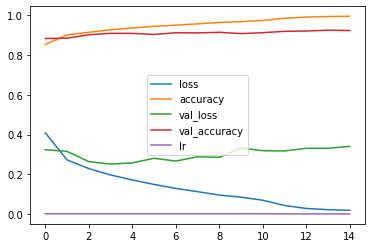

In [ ]:
pd.DataFrame(model_2.history.history).plot()

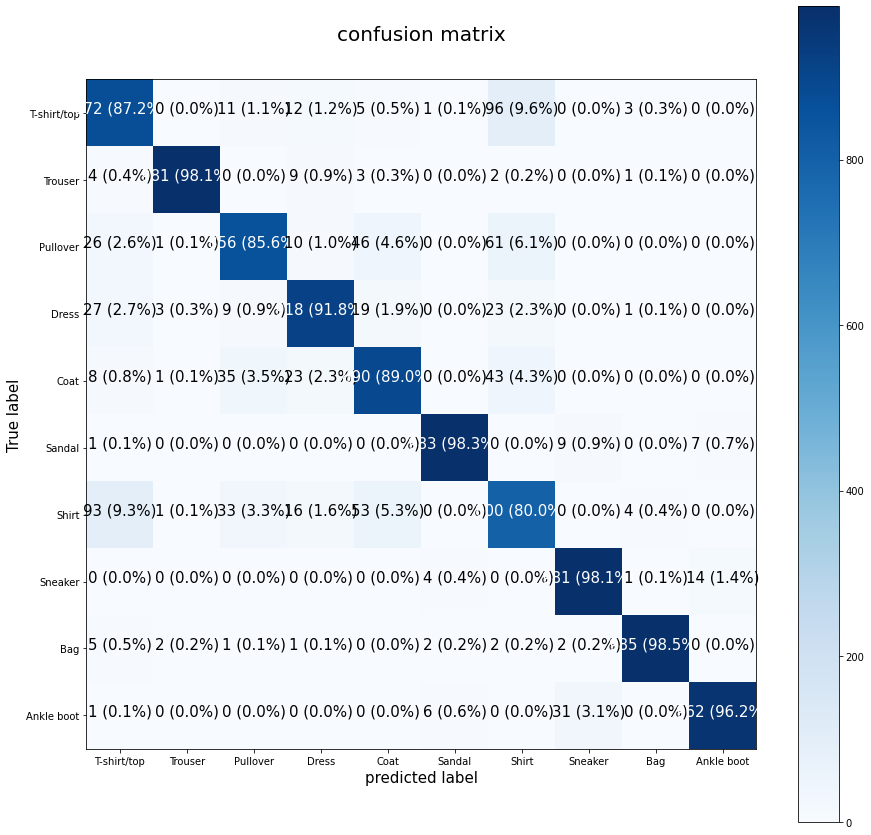

In [ ]:
make_confusion_matrix(test_labels,tf.argmax(tf.round((model_2.predict(test_data_norm))),axis=-1),class_names,figsize=(15,15))

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_data,train_labels) , (test_data,test_labels) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
split_shirts_data = np.empty((0,28,28))
split_shirts_labels = np.empty((0,))

3


(<matplotlib.image.AxesImage at 0x7f9547fa2c50>, None)

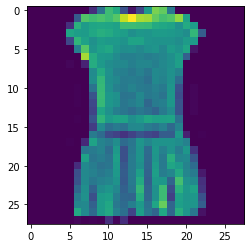

In [ ]:
plt.imshow(train_data[3]),print(train_labels[3])

# Extracting ['T-shirt/top', 'Pullover', 'Coat','Shirt'] from dataset for training

In [ ]:
split_shirts_data = np.empty((0,28,28))
split_shirts_labels = np.empty((0,))
print(f'Copying shirts data')
for i in range(0,train_data.shape[0]):
  print(f'progress = {i} images done')
  if train_labels[i]==0 or train_labels[i]==2 or train_labels[i]==4 or train_labels[i]==6:
    split_shirts_data = np.append(split_shirts_data,train_data[i][np.newaxis,...],axis=0)
    split_shirts_labels = np.append(split_shirts_labels,train_labels[i][np.newaxis,...],axis=0)
    


Streaming output truncated to the last 5000 lines.
progress = 55000 images done
progress = 55001 images done
progress = 55002 images done
progress = 55003 images done
progress = 55004 images done
progress = 55005 images done
progress = 55006 images done
progress = 55007 images done
progress = 55008 images done
progress = 55009 images done
progress = 55010 images done
progress = 55011 images done
progress = 55012 images done
progress = 55013 images done
progress = 55014 images done
progress = 55015 images done
progress = 55016 images done
progress = 55017 images done
progress = 55018 images done
progress = 55019 images done
progress = 55020 images done
progress = 55021 images done
progress = 55022 images done
progress = 55023 images done
progress = 55024 images done
progress = 55025 images done
progress = 55026 images done
progress = 55027 images done
progress = 55028 images done
progress = 55029 images done
progress = 55030 images done
progress = 55031 images done
progress = 55032 imag

# Extracting ['T-shirt/top', 'Pullover', 'Coat','Shirt'] from dataset for testing

In [ ]:
split_shirts_test_data = np.empty((0,28,28))
split_shirts_test_labels = np.empty((0,))
print(f'Copying shirts data')
for i in range(0,test_data.shape[0]):
  print(f'progress = {i} images done')
  
  if test_labels[i]==0 or test_labels[i]==2 or test_labels[i]==4 or test_labels[i]==6:
    split_shirts_test_data = np.append(split_shirts_test_data,test_data[i][np.newaxis,...],axis=0)
    split_shirts_test_labels = np.append(split_shirts_test_labels,test_labels[i][np.newaxis,...],axis=0)

Streaming output truncated to the last 5000 lines.
progress = 5000 images done
progress = 5001 images done
progress = 5002 images done
progress = 5003 images done
progress = 5004 images done
progress = 5005 images done
progress = 5006 images done
progress = 5007 images done
progress = 5008 images done
progress = 5009 images done
progress = 5010 images done
progress = 5011 images done
progress = 5012 images done
progress = 5013 images done
progress = 5014 images done
progress = 5015 images done
progress = 5016 images done
progress = 5017 images done
progress = 5018 images done
progress = 5019 images done
progress = 5020 images done
progress = 5021 images done
progress = 5022 images done
progress = 5023 images done
progress = 5024 images done
progress = 5025 images done
progress = 5026 images done
progress = 5027 images done
progress = 5028 images done
progress = 5029 images done
progress = 5030 images done
progress = 5031 images done
progress = 5032 images done
progress = 5033 images do

(<matplotlib.image.AxesImage at 0x7f95479edd10>, 4.0)

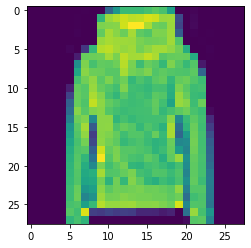

In [ ]:
plt.imshow(split_shirts_data[603]),split_shirts_labels[603]

In [ ]:
np.unique(split_shirts_labels)

array([0., 2., 4., 6.])

# Normalizing training and test data

In [ ]:
split_shirts_data_norm = split_shirts_data/255.
split_shirts_data_test_norm = split_shirts_test_data/255.

In [ ]:
split_shirts_data_norm = split_shirts_data_norm.reshape(-1,28,28,1)

# Converting labels [0,2,4,6] to [0,1,2,3]

In [ ]:
shirt_duplicate_train_labels = []

for i in split_shirts_labels:
  if i==0:
    shirt_duplicate_train_labels.append(0)
  elif i==2:
    shirt_duplicate_train_labels.append(1)
  elif i==4:
    shirt_duplicate_train_labels.append(2)
  else:
    shirt_duplicate_train_labels.append(3)

In [ ]:
shirt_duplicate_test_labels = []

for i in split_shirts_test_labels:
  if i==0:
    shirt_duplicate_test_labels.append(0)
  elif i==2:
    shirt_duplicate_test_labels.append(1)
  elif i==4:
    shirt_duplicate_test_labels.append(2)
  else:
    shirt_duplicate_test_labels.append(3)

In [ ]:
shirt_duplicate_train_labels1 = np.array(shirt_duplicate_train_labels)




# Training model on classes ['T-shirt/top', 'Pullover', 'Coat','Shirt']

In [ ]:
tf.random.set_seed(42)
def scheduler(epoch,lr):
  if epoch>10 and epoch<15:
    return lr*0.5
  return lr

model_3 = tf.keras.Sequential([
                               tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
                               tf.keras.layers.MaxPool2D((2,2)),
                            
                               tf.keras.layers.Flatten(),
                               tf.keras.layers.Dense(100,'relu'),
                               
                               tf.keras.layers.Dense(4,'softmax')

])
callback = tf.keras.callbacks.LearningRateScheduler(scheduler)
model_3.compile(optimizer=tf.keras.optimizers.Adam(),loss=tf.keras.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])

model_3.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 100)               540900    
_________________________________________________________________
dense_13 (Dense)             (None, 4)                 404       
Total params: 541,624
Trainable params: 541,624
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_3.fit(split_shirts_data_norm,shirt_duplicate_train_labels1,epochs=20,validation_data=(split_shirts_data_test_norm.reshape((-1,28,28,1)),np.array(shirt_duplicate_test_labels)),callbacks=[callback])

Epoch 1/20
750/750 [==============================] - 2s 3ms/step - loss: 0.6256 - accuracy: 0.7536 - val_loss: 0.5296 - val_accuracy: 0.8033
Epoch 2/20
750/750 [==============================] - 2s 2ms/step - loss: 0.4657 - accuracy: 0.8190 - val_loss: 0.4717 - val_accuracy: 0.8095
Epoch 3/20
750/750 [==============================] - 2s 3ms/step - loss: 0.4110 - accuracy: 0.8391 - val_loss: 0.4387 - val_accuracy: 0.8250
Epoch 4/20
750/750 [==============================] - 2s 3ms/step - loss: 0.3671 - accuracy: 0.8599 - val_loss: 0.4260 - val_accuracy: 0.8300
Epoch 5/20
750/750 [==============================] - 2s 3ms/step - loss: 0.3373 - accuracy: 0.8701 - val_loss: 0.3980 - val_accuracy: 0.8482
Epoch 6/20
750/750 [==============================] - 2s 3ms/step - loss: 0.3108 - accuracy: 0.8772 - val_loss: 0.4340 - val_accuracy: 0.8242
Epoch 7/20
750/750 [==============================] - 2s 3ms/step - loss: 0.2852 - accuracy: 0.8917 - val_loss: 0.3857 - val_accuracy: 0.8560
Epoch 

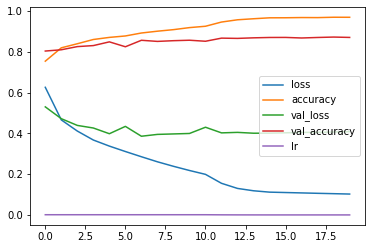

In [ ]:
pd.DataFrame(model_3.history.history).plot()



# making predictions from model_3 

In [ ]:
prediction = (tf.argmax(tf.round(model_3.predict(split_shirts_data_test_norm.reshape((-1,28,28,1)))),axis=-1)).numpy()

In [ ]:
prediction

array([1, 3, 2, ..., 1, 3, 1])

# Confusion Matrix 

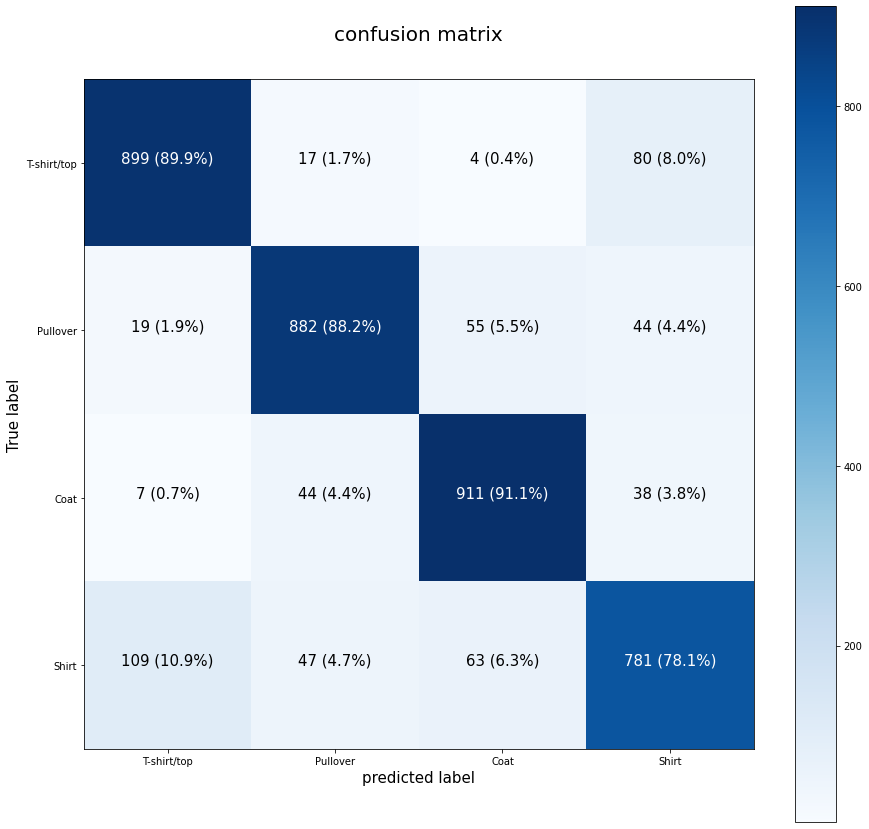

In [ ]:
class_names_shirts = ['T-shirt/top', 'Pullover', 'Coat','Shirt']
make_confusion_matrix(np.array(shirt_duplicate_test_labels),prediction,class_names_shirts,figsize=(15,15))

# Combining two neural networks to see if they perform better combined

*  Changing ['T-shirt/top', 'Pullover', 'Coat','Shirt'] labels to 0, we can pass these labels to model_3

In [ ]:
without_split_test_labels = np.copy(test_labels)
without_split_train_labels = np.copy(train_labels)
for i in range(without_split_test_labels.shape[0]):
  if without_split_test_labels[i]==0 or without_split_test_labels[i]==2 or without_split_test_labels[i]==4 or without_split_test_labels[i]==6:
    without_split_test_labels[i]=0
  elif without_split_test_labels[i]==3:
    without_split_test_labels[i]=2
  elif without_split_test_labels[i]==5:
    without_split_test_labels[i]=3
  elif without_split_test_labels[i]==7:
    without_split_test_labels[i]=4
  elif without_split_test_labels[i]==8:
    without_split_test_labels[i]=5
  elif without_split_test_labels[i]==9:
    without_split_test_labels[i]=6
for i in range(without_split_train_labels.shape[0]):
  if without_split_train_labels[i]==0 or without_split_train_labels[i]==2 or without_split_train_labels[i]==4 or without_split_train_labels[i]==6:
    without_split_train_labels[i]=0
  elif without_split_train_labels[i]==3:
    without_split_train_labels[i]=2
  elif without_split_train_labels[i]==5:
    without_split_train_labels[i]=3
  elif without_split_train_labels[i]==7:
    without_split_train_labels[i]=4
  elif without_split_train_labels[i]==8:
    without_split_train_labels[i]=5
  elif without_split_train_labels[i]==9:
    without_split_train_labels[i]=6

In [ ]:
tf.random.set_seed(42)
def scheduler(epoch,lr):
  if epoch>10 and epoch<15:
    return lr*0.5
  return lr

model_4 = tf.keras.Sequential([
                               tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
                               tf.keras.layers.MaxPool2D((2,2)),
                            
                               tf.keras.layers.Flatten(),
                               tf.keras.layers.Dense(100,'relu'),
                               
                               tf.keras.layers.Dense(7,'softmax')

])
callback = tf.keras.callbacks.LearningRateScheduler(scheduler)
model_4.compile(optimizer=tf.keras.optimizers.Adam(),loss=tf.keras.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])

model_4.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 100)               540900    
_________________________________________________________________
dense_15 (Dense)             (None, 7)                 707       
Total params: 541,927
Trainable params: 541,927
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_4.fit(train_data_norm,np.array(without_split_train_labels),epochs=20,callbacks=[callback],validation_data=(test_data_norm,without_split_test_labels))

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1674 - accuracy: 0.9436 - val_loss: 0.1163 - val_accuracy: 0.9590
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0970 - accuracy: 0.9651 - val_loss: 0.1197 - val_accuracy: 0.9589
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0737 - accuracy: 0.9730 - val_loss: 0.0963 - val_accuracy: 0.9656
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0591 - accuracy: 0.9782 - val_loss: 0.0972 - val_accuracy: 0.9677
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0484 - accuracy: 0.9820 - val_loss: 0.0944 - val_accuracy: 0.9696
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0393 - accuracy: 0.9855 - val_loss: 0.1105 - val_accuracy: 0.9673
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0327 - accuracy: 0.9879 - val_loss: 0.1044 - val_accuracy:

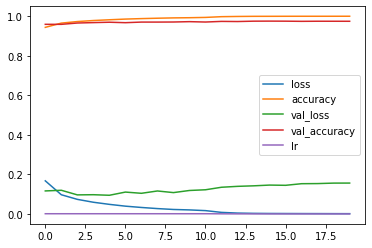

In [ ]:
pd.DataFrame(model_4.history.history).plot()

# Making prediction with model_4

In [ ]:
prediction_without_shirts = (tf.argmax(tf.round(model_4.predict(test_data_norm)),axis=-1)).numpy()

In [ ]:
for i in range(prediction_without_shirts.shape[0]):
  if prediction_without_shirts[i]==2:
    prediction_without_shirts[i]=3
  elif prediction_without_shirts[i]==3:
    prediction_without_shirts[i]=5
  elif prediction_without_shirts[i]==4:
    prediction_without_shirts[i]=7
  elif prediction_without_shirts[i]==5:
    prediction_without_shirts[i]=8
  elif prediction_without_shirts[i]==6:
    prediction_without_shirts[i]=9
  

In [ ]:
for i in range(prediction_without_shirts.shape[0]):
  if prediction_without_shirts[i]==0:

    prediction = tf.squeeze(tf.argmax(model_3.predict(train_data_norm[i].reshape((1,28,28,1))),axis=-1)).numpy()
    if prediction==0:
      prediction_without_shirts[i]=0
    elif prediction==1:
      prediction_without_shirts[i]=2
    elif prediction==2:
      prediction_without_shirts[i]=4
    elif prediction==3:
      prediction_without_shirts[i]=6


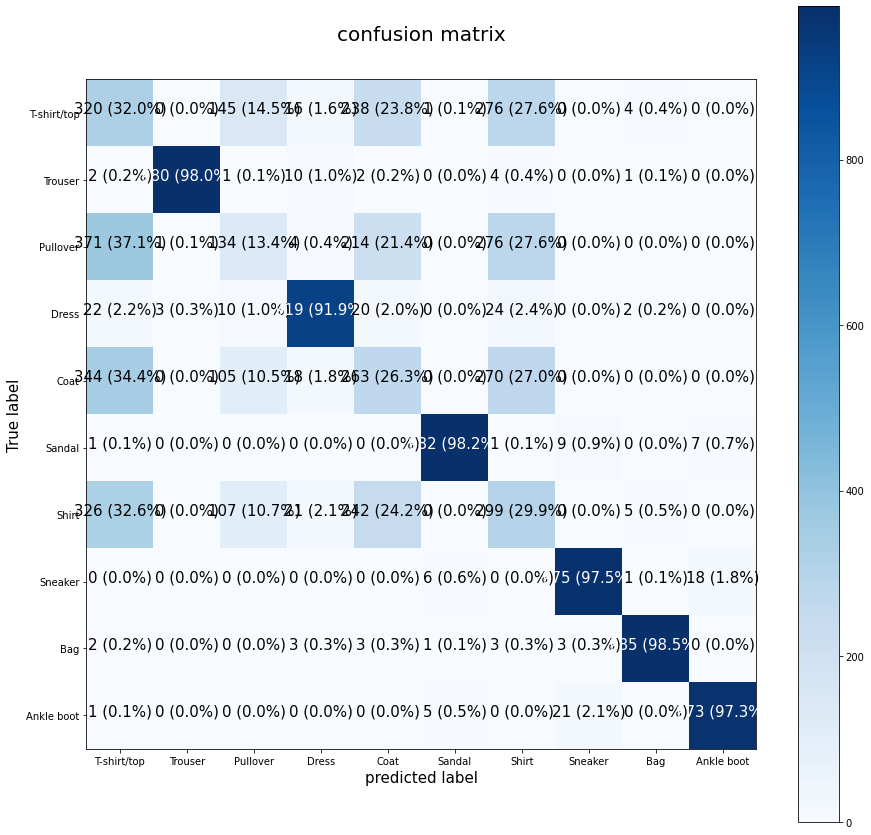

In [ ]:
make_confusion_matrix(test_labels,prediction_without_shirts,class_names,figsize=(15,15)) 

# I guess it doesnt perform better